<img src="https://images.squarespace-cdn.com/content/v1/5b80256a25bf0202e059a9d3/40c9f7f3-e8eb-498d-b416-88e3f04d10d0/AdobeStock_362621618.jpeg" width="700">
<p style="text-align:right"><a href="https://images.squarespace-cdn.com/content/v1/5b80256a25bf0202e059a9d3/40c9f7f3-e8eb-498d-b416-88e3f04d10d0/AdobeStock_362621618.jpeg">Image source</a></p>

# <div style="color:white;display:fill;border-radius:5px;background-color:#8ABEB9;overflow:hidden"><p style="padding:20px;color:white;overflow:hidden;font-size:100%;margin:0;text-align:center">Introduction</p></div>

Employee retention strategies are integral to the success and well-being of a company. There are often many reasons why employees leave an organization, and in this case study, I will explore some of the key drivers of employee attrition. Employee attrition measures how many workers have left an organization and is a common metric companies use to assess their performance. While turnover rates vary from industry to industry, the [Bureau of Labor Statistics reported](https://www.bls.gov/news.release/jolts.t18.htm#) that among voluntary separations the overall turnover rate was 25% in 2020.

In this notebook, I will explore IBM's [dataset](https://www.kaggle.com/pavansubhasht/ibm-hr-analytics-attrition-dataset) on HR Analytics. The data consists of nearly 1,500 current and former employees with information related to their job satisfaction, work life balance, tenure, experience, salary, and demographic data. Below is a brief overview and summary statistics of the data.

In [76]:
import warnings
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
import plotly.graph_objects as go
import scipy
from scipy.stats import chi2_contingency 
from plotly.subplots import make_subplots
from plotly.offline import init_notebook_mode
from statistics import stdev
from pprint import pprint
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import RobustScaler, StandardScaler
from sklearn.model_selection import RandomizedSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, roc_auc_score
warnings.filterwarnings("ignore")
import plotly.figure_factory as ff
init_notebook_mode(connected=True)
sns.set_context("notebook")

data = pd.read_csv(r"WA_Fn-UseC_-HR-Employee-Attrition.csv")
print("There are {:,} rows and {} columns in the data.".format(data.shape[0], data.shape[1]))
print("There are {} missing values in the data.".format(data.isnull().sum().sum()))
data.head()

There are 1,470 rows and 35 columns in the data.
There are 0 missing values in the data.


,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2


## <b><span style='color:#68A19B'>1.1</span> | Summary Statistics of numeric variables</b>

In [78]:
data.describe()

,Age,DailyRate,DistanceFromHome,Education,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
count,1470.000000,1470.000000,1470.000000,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,...,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000
mean,36.923810,802.485714,9.192517,2.912925,1.0,1024.865306,2.721769,65.891156,2.729932,2.063946,...,2.712245,80.0,0.793878,11.279592,2.799320,2.761224,7.008163,4.229252,2.187755,4.123129
std,9.135373,403.509100,8.106864,1.024165,0.0,602.024335,1.093082,20.329428,0.711561,1.106940,...,1.081209,0.0,0.852077,7.780782,1.289271,0.706476,6.126525,3.623137,3.222430,3.568136
min,18.000000,102.000000,1.000000,1.000000,1.0,1.000000,1.000000,30.000000,1.000000,1.000000,...,1.000000,80.0,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,30.000000,465.000000,2.000000,2.000000,1.0,491.250000,2.000000,48.000000,2.000000,1.000000,...,2.000000,80.0,0.000000,6.000000,2.000000,2.000000,3.000000,2.000000,0.000000,2.000000
50%,36.000000,802.000000,7.000000,3.000000,1.0,1020.500000,3.000000,66.000000,3.000000,2.000000,...,3.000000,80.0,1.000000,10.000000,3.000000,3.000000,5.000000,3.000000,1.000000,3.000000
75%,43.000000,1157.000000,14.000000,4.000000,1.0,1555.750000,4.000000,83.750000,3.000000,3.000000,...,4.000000,80.0,1.000000,15.000000,3.000000,3.000000,9.000000,7.000000,3.000000,7.000000
max,60.000000,1499.000000,29.000000,5.000000,1.0,2068.000000,4.000000,100.000000,4.000000,5.000000,...,4.000000,80.0,3.000000,40.000000,6.000000,4.000000,40.000000,18.000000,15.000000,17.000000


## <b><span style='color:#68A19B'>1.2</span> | Summary Statistics of categorical variables</b>

In [80]:
# 1. Get categorical columns
cat_cols = data.select_dtypes(include='object').columns.tolist()

# 2. Show summary statistics of categorical columns
print("Categorical Summary:")
display(data[cat_cols].describe())

# 3. Value counts for each categorical column
for col in cat_cols:
    print(f"\n--- {col} ---")
    print(data[col].value_counts())


Categorical Summary:


,Attrition,BusinessTravel,Department,EducationField,Gender,JobRole,MaritalStatus,Over18,OverTime
count,1470,1470,1470,1470,1470,1470,1470,1470,1470
unique,2,3,3,6,2,9,3,1,2
top,No,Travel_Rarely,Research & Development,Life Sciences,Male,Sales Executive,Married,Y,No
freq,1233,1043,961,606,882,326,673,1470,1054



--- Attrition ---
Attrition
No     1233
Yes     237
Name: count, dtype: int64

--- BusinessTravel ---
BusinessTravel
Travel_Rarely        1043
Travel_Frequently     277
Non-Travel            150
Name: count, dtype: int64

--- Department ---
Department
Research & Development    961
Sales                     446
Human Resources            63
Name: count, dtype: int64

--- EducationField ---
EducationField
Life Sciences       606
Medical             464
Marketing           159
Technical Degree    132
Other                82
Human Resources      27
Name: count, dtype: int64

--- Gender ---
Gender
Male      882
Female    588
Name: count, dtype: int64

--- JobRole ---
JobRole
Sales Executive              326
Research Scientist           292
Laboratory Technician        259
Manufacturing Director       145
Healthcare Representative    131
Manager                      102
Sales Representative          83
Research Director             80
Human Resources               52
Name: count, dtype: int

# <div style="color:white;display:fill;border-radius:5px;background-color:#8ABEB9;overflow:hidden"><p style="padding:20px;color:white;overflow:hidden;font-size:100%;margin:0;text-align:center">Exploratory Data Analysis</p></div>

In [82]:
from plotly.subplots import make_subplots
import plotly.graph_objects as go

# Create subplot (1 row, 2 cols)
fig = make_subplots(rows=1, cols=2,
                    subplot_titles=("Attrition Percentage", "Attrition by Department"),
                    specs=[[{"type": "bar"}, {"type": "pie"}]])

# --- Bar chart: Attrition distribution ---
attrition_counts = data['Attrition'].value_counts(normalize=True) * 100
fig.add_trace(
    go.Bar(x=attrition_counts.index,
           y=attrition_counts.values,
           text=[f"{v:.1f}%" for v in attrition_counts.values],
           textposition="outside"),
    row=1, col=1
)

# --- Pie chart: Attrition by Department (only "Yes") ---
dept_counts = data.loc[data['Attrition']=="Yes", "Department"].value_counts(normalize=True) * 100
fig.add_trace(
    go.Pie(labels=dept_counts.index,
           values=dept_counts.values,
           hole=0.4),
    row=1, col=2
)

# Layout
fig.update_layout(title="Employee Attrition Statistics")
fig.show()


This small dashboard shows the attrition rates among employees in the previous quarter. Overall, around 16% of employees left the company. Among former employees, over half worked in Research & Development, while only 5% were from Human Resources. 

In [84]:
import plotly.express as px

# Group by Gender, Department and Attrition → percentage
plot_df = (
    data.groupby(['Gender','Department'])['Attrition']
    .value_counts(normalize=True)
    .mul(100)
    .rename('Percent')
    .reset_index()
)

# Plot grouped bar with facets by Gender
fig = px.bar(plot_df,
             x="Department", y="Percent",
             color="Attrition", barmode="group",
             facet_col="Gender",
             text="Percent")

# Simple formatting
fig.update_traces(texttemplate='%{text:.1f}%', textposition='outside')
fig.update_layout(title="Attrition Rates by Department and Gender",
                  yaxis_ticksuffix="%", height=500)
fig.show()


Women in Human Resources experienced the highest amount of turnover, with nearly 1 out of every 3 women in HR leaving the company. For men, the highest turnover occurred in the Sales department.

In [86]:
plot_df = data.groupby(['WorkLifeBalance','Gender'])['Attrition'].value_counts(normalize=True)
plot_df = plot_df.mul(100).rename('Percent').reset_index()
fig = px.bar(plot_df, x='WorkLifeBalance', y='Percent', color='Attrition',
             facet_row='Gender', text='Percent', opacity=0.75, barmode='group', 
             category_orders={'Attrition': ['Yes', 'No']},
             color_discrete_map={'Yes': '#C02B34','No': '#CDBBA7'})
fig.update_traces(texttemplate='%{text:.2s}%', textposition='outside', 
                  marker_line=dict(width=1, color='#28221D'))
fig.update_yaxes(title="",zeroline=True, zerolinewidth=1, zerolinecolor='#1F0202',ticksuffix = '%')
fig.update_layout(title_text='Attrition Rates by Work Life Balance and Gender',height=750,font_color='#28221D',
                  xaxis_title='Work Life Balance', paper_bgcolor='#F4F2F0', plot_bgcolor='#F4F2F0', 
                  xaxis = dict(tickmode = 'array', tickvals = [1, 2, 3, 4],
                               ticktext = ['Poor', 'Neutral', 'Good', 'Excellent']))
fig.show()

Among women with the highest rated work life balance, 1 out of 4 left the company, the highest proportion among the ratings for women. For men, the highest proportion occurred in those with the lowest work life balance. 

In [88]:
import plotly.express as px
import pandas as pd

# Grouping and percentage calculation
plot_df = (
    data.groupby(['Attrition'])['JobSatisfaction']
    .value_counts(normalize=True)
    .mul(100)
    .rename('Percent')
    .reset_index()
    .sort_values('JobSatisfaction')
)

# Rename Job Satisfaction categories
plot_df['JobSatisfaction'] = plot_df['JobSatisfaction'].map({
    1: 'Poor', 2: 'Neutral', 3: 'Good', 4: 'Excellent'
})

# Custom colors for satisfaction levels
color_map = {
    'Poor': '#E74C3C',       # Red
    'Neutral': '#F1C40F',    # Yellow
    'Good': '#2ECC71',       # Green
    'Excellent': '#3498DB'   # Blue
}

# Bar plot with colors
fig = px.bar(plot_df,
             x="JobSatisfaction", y="Percent",
             text="Percent",
             color="JobSatisfaction",
             facet_col="Attrition",
             category_orders={"Attrition": ["Yes", "No"]},
             color_discrete_map=color_map)

# Add percentage labels
fig.update_traces(texttemplate='%{text:.1f}%', textposition='outside')

# Layout
fig.update_layout(title="Attrition Rates by Job Satisfaction",
                  yaxis_ticksuffix="%",
                  xaxis_title="Job Satisfaction",
                  height=600)

fig.show()


Among employees who left, the majority were satisfied in their job with 53% rating their job satisfaction as Good or Excellent, while 28% were the least satisfied in their job.

In [90]:
import plotly.express as px

# Group by Department & Gender → average MonthlyIncome → annual salary
plot_df = (
    data.groupby(['Department', 'Gender'])['MonthlyIncome']
    .mean()
    .mul(12)  # convert monthly to annual
    .rename('Salary')
    .reset_index()
    .sort_values('Salary', ascending=False)
)

# Color map for Gender
color_map = {'Female': '#214D5C', 'Male': '#ACBCC2'}

# Bar plot
fig = px.bar(plot_df,
             x='Department', y='Salary',
             color='Gender', text='Salary',
             barmode='group', opacity=0.75,
             color_discrete_map=color_map)

# Dollar formatting for text
fig.update_traces(texttemplate='$%{text:,.0f}', textposition='outside')

# Layout adjustments
fig.update_layout(
    title="Average Salaries by Department & Gender",
    yaxis=dict(title='Salary', tickprefix='$', zeroline=True, zerolinewidth=1, zerolinecolor='#28221D'),
    paper_bgcolor='#F4F2F0', plot_bgcolor='#F4F2F0', font_color='#28221D'
)

fig.show()


Across each department, women on average have higher salaries than men. 

In [92]:
import plotly.express as px

# Group by Department, Attrition, Gender → median MonthlyIncome → annual salary
plot_df = (
    data.groupby(['Department', 'Attrition', 'Gender'])['MonthlyIncome']
    .median()
    .mul(12)  # convert to annual
    .rename('Salary')
    .reset_index()
)

# Sort by Gender (optional)
plot_df = plot_df.sort_values('Gender')

# Color map for Gender
color_map = {'Female': '#214D5C', 'Male': '#ACBCC2'}

# Bar plot with facet by Attrition
fig = px.bar(plot_df,
             x='Department', y='Salary',
             color='Gender', text='Salary',
             barmode='group', opacity=0.75,
             facet_col='Attrition',
             category_orders={'Attrition': ['Yes', 'No']},
             color_discrete_map=color_map)

# Dollar formatting for text
fig.update_traces(texttemplate='$%{text:,.0f}', textposition='outside')

# Layout adjustments
fig.update_layout(
    title="Median Salaries by Department and Attrition Status",
    yaxis=dict(title='Salary', tickprefix='$', range=(0, 80000), zeroline=True, zerolinewidth=1, zerolinecolor='#28221D'),
    width=950, height=500,
    paper_bgcolor='#F4F2F0', plot_bgcolor='#F4F2F0', font_color='#28221D'
)

fig.show()


In comparison to current employees, former employees had lower median salaries across all three departments. In Human Resources, women tend to have higher median salaries than men.

In [94]:
import plotly.express as px

# Group by JobRole → average MonthlyIncome → annual salary
plot_df = (
    data.groupby('JobRole')['MonthlyIncome']
    .mean()
    .mul(12)  # convert monthly to annual
    .rename('Salary')
    .reset_index()
    .sort_values('Salary', ascending=False)
)

# Bar plot
fig = px.bar(plot_df,
             x='JobRole', y='Salary',
             text='Salary', opacity=0.7,
             color_discrete_sequence=['#3A5F53'])  # single color

# Dollar formatting for labels
fig.update_traces(texttemplate='$%{text:,.0f}', textposition='outside',
                  marker_line=dict(width=1, color='#28221D'))

# Layout adjustments
fig.update_layout(
    title="Average Salaries by Job Role",
    yaxis=dict(title='Salary', tickprefix='$', zeroline=True, zerolinewidth=1, zerolinecolor='#28221D'),
    xaxis_title='',
    height=500,
    paper_bgcolor='#F4F2F0', plot_bgcolor='#F4F2F0',
    font_color='#28221D'
)

fig.show()


Managers and Research Directors have the highest average salaries, while Laboratory Technicians and Sales Representatives have the lowest.

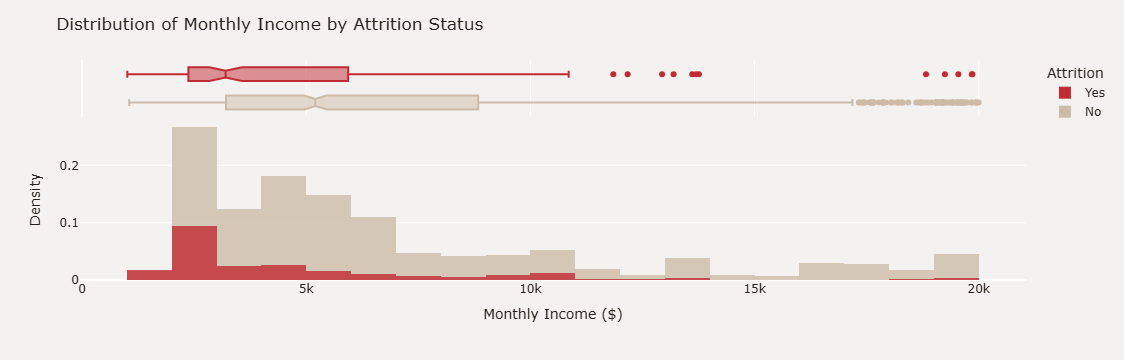

In [96]:
import plotly.express as px

# Sort by Attrition (optional)
plot_df = data.sort_values(by="Attrition")

# Histogram with overlay and marginal boxplot
fig = px.histogram(plot_df,
                   x='MonthlyIncome',
                   color='Attrition',
                   histnorm='density',
                   barmode='overlay',
                   marginal='box',
                   opacity=0.8,
                   color_discrete_map={'Yes': '#C02B34','No': '#CDBBA7'})

# Layout adjustments
fig.update_layout(
    title="Distribution of Monthly Income by Attrition Status",
    xaxis_title="Monthly Income ($)",
    yaxis_title="Density",
    font_color='#28221D',
    paper_bgcolor='#F4F2F0',
    plot_bgcolor='#F4F2F0',
    legend_traceorder='reversed'
)

fig.show()


The distribution of monthly income for both current and former employees is positively skewed and lower overall among staff who left. Former employees had a median monthly income more than $2,000 less than current employees.

In [98]:
import plotly.graph_objects as go

# Colors for genders
colors = ['#214D5C', '#91ABB4']

# Create figure
fig = go.Figure()

# Add box plots for each Gender
for i, gender in enumerate(data['Gender'].unique()):
    df_plot = data[data['Gender'] == gender]
    fig.add_trace(
        go.Box(
            x=df_plot['WorkLifeBalance'],
            y=df_plot['MonthlyIncome'],
            notched=True,
            line=dict(color=colors[i]),
            name=gender
        )
    )

# Layout
fig.update_layout(
    title="Distribution of Monthly Income by Work Life Balance",
    xaxis_title="Work Life Balance",
    boxmode='group',
    font_color='#28221D',
    xaxis=dict(
        tickmode='array',
        tickvals=[1, 2, 3, 4],
        ticktext=['Poor', 'Fair', 'Good', 'Excellent']
    ),
    paper_bgcolor='#F4F2F0',
    plot_bgcolor='#F4F2F0'
)

fig.show()


Women with the lowest-rated work life balance have the highest median salary out of all of the groups at $5,400/month.

In [100]:
import plotly.express as px
import pandas as pd

# Copy data and rename JobLevel categories
plot_df = data.copy()
plot_df['JobLevel'] = plot_df['JobLevel'].map({
    1: 'Entry level',
    2: 'Mid level',
    3: 'Senior',
    4: 'Lead',
    5: 'Executive'
})

# Custom colors for Job Levels
colors = ['#73AF8E', '#4F909B', '#707BAD', '#A89DB7', '#C99193']

# Scatter plot
fig = px.scatter(
    plot_df,
    x='TotalWorkingYears',
    y='MonthlyIncome',
    color='JobLevel',
    size='MonthlyIncome',
    color_discrete_sequence=colors,
    category_orders={'JobLevel': ['Entry level', 'Mid level', 'Senior', 'Lead', 'Executive']}
)

# Layout
fig.update_layout(
    title='Monthly Income vs Total Working Years by Job Level',
    xaxis_title='Total Working Years',
    yaxis_title='Income',
    yaxis_tickprefix='$',
    legend=dict(orientation="h", yanchor="bottom", y=1.02, xanchor="right", x=1),
    legend_title='',
    font_color='#28221D',
    paper_bgcolor='#F4F2F0',
    plot_bgcolor='#F4F2F0',
    margin=dict(l=40, r=30, b=80, t=120)
)

fig.show()


Based on the scatterplot above, monthly income is positively correlated with total number of years worked and there is strong association between an employee's earnings and their job level.

In [102]:
import plotly.figure_factory as ff
import pandas as pd

# Select numerical columns only
cat_cols = [col for col in data.columns if data[col].nunique() <= 5 or data[col].dtype == object]
df = data.drop(columns=cat_cols + ['EmployeeNumber'])

# Compute correlation matrix
corr = df.corr().round(2)

# Heatmap values
z = corr.to_numpy()
x = corr.columns.tolist()
y = corr.index.tolist()

# Annotated heatmap
fig = ff.create_annotated_heatmap(
    z=z,
    x=x,
    y=y,
    annotation_text=z,
    colorscale='GnBu',
    hovertemplate="Correlation between %{x} and %{y} = %{z}"
)

# Reverse y-axis to match matrix style
fig.update_yaxes(autorange="reversed")

# Layout
fig.update_layout(
    title="Correlation Matrix of Employee Attrition",
    font_color='#28221D',
    height=600,
    margin=dict(t=180)
)

fig.show()


Confirming our findings in the scatterplot above, `MonthlyIncome` has a strong positive correlation to `TotalWorkingYears` of 0.77. Additionally, `YearsAtCompany` has a strong positive association with `YearsWithCurrManager` (correlation = 0.77), as well as with `YearsInCurrentRole` (correlation = 0.76). There are no variables with a correlation above 0.8, indicating a potential collinearity issue.

# <div style="color:white;display:fill;border-radius:5px;background-color:#8ABEB9;overflow:hidden"><p style="padding:20px;color:white;overflow:hidden;font-size:100%;margin:0;text-align:center">Data Cleaning and Preprocessing</p></div>

There are several columns in the data that have numeric values that represent categories, like `Education` that has values of 1 through 5 representing different levels of education. These columns were converted to categorical variables to perform significance testing for feature selection. I then removed columns with zero variance from the data since these can lead to errors in model fitting. Lastly, to reduce the skewness in the data, I log-transformed variables that had a skewness above 0.75.

In [105]:
import pandas as pd
import numpy as np

# Identify categorical columns (excluding target)
cat_cols = [col for col in data.columns if data[col].dtype == 'object' and col != 'Attrition']

# Convert categorical columns to category type
for col in cat_cols:
    data[col] = pd.Categorical(data[col])

# Initialize list for zero-variance columns
nzv = []

for col in data.columns:
    if col in cat_cols:  # Factorize categorical columns
        vals = data[col].cat.codes
    elif pd.api.types.is_numeric_dtype(data[col]):  # Numeric columns
        vals = data[col].values
    else:
        continue  # Skip other columns

    if np.std(vals) == 0:
        nzv.append(col)

# Drop zero-variance columns + EmployeeNumber
data.drop(columns=nzv + ['EmployeeNumber'], inplace=True)

# Copy cleaned dataframe
df = data.copy()
df.shape


(1470, 31)

In [106]:
import numpy as np
import pandas as pd

df = data.copy()  # work on a copy
skew_limit = 0.75

# Find numeric columns with high skew
skew_cols = df.select_dtypes(include=np.number).skew()
skew_cols = skew_cols[abs(skew_cols) > skew_limit]

# Display skewed columns
print("Columns to log-transform:", skew_cols.index.tolist())

# Log-transform skewed columns
for col in skew_cols.index:
    df[col] = np.log1p(df[col])


Columns to log-transform: ['DistanceFromHome', 'JobLevel', 'MonthlyIncome', 'NumCompaniesWorked', 'PercentSalaryHike', 'PerformanceRating', 'StockOptionLevel', 'TotalWorkingYears', 'YearsAtCompany', 'YearsInCurrentRole', 'YearsSinceLastPromotion', 'YearsWithCurrManager']


# <div style="color:white;display:fill;border-radius:5px;background-color:#8ABEB9;overflow:hidden"><p style="padding:20px;color:white;overflow:hidden;font-size:100%;margin:0;text-align:center">Hypothesis Testing</p></div>
## <b><span style='color:#68A19B'>I.</span> Independent T-Test</b>

To compare the average monthly income among current and former employees, I'll perform an independent t-test. This will allow us to determine whether there is a statistically significant difference between the average incomes of the two populations. To test this, I'll use the log-transformed data since one of the assumptions of the test is that the continuous variable is approximately normally distributed.

#### Hypothesis:

$H_{0}$: The null hypothesis for the t-test is that the average monthly income of former employees is the same as current employees. 
$$
  u_{1} = u_{2}
$$  
$H_{1}$: The alternative hypothesis is that the average monthly income of former employees is different than current employees.
$$
  u_{1} \neq u_{2}
$$

In [109]:
!pip install researchpy

In [110]:
import researchpy as rp
summary, res=rp.ttest(group1=df['MonthlyIncome'][df['Attrition']=='Yes'], 
                      group2=df['MonthlyIncome'][df['Attrition']=='No'], 
                      group1_name='Former Employees', group2_name='Current Employees')
print("\nSummary Statistics:")
display(summary)
display(res)


Summary Statistics:


,Variable,N,Mean,SD,SE,95% Conf.,Interval
0,Former Employees,237.0,8.252532,0.640059,0.041576,8.170624,8.334440
1,Current Employees,1233.0,8.610458,0.653497,0.018611,8.573946,8.646970
2,combined,1470.0,8.552752,0.664313,0.017327,8.518764,8.586739


,Independent t-test,results
0,Difference (Former Employees - Current Employe...,-0.3579
1,Degrees of freedom =,1468.0000
2,t =,-7.7477
3,Two side test p value =,0.0000
4,Difference < 0 p value =,0.0000
5,Difference > 0 p value =,1.0000
6,Cohen's d =,-0.5495
7,Hedge's g =,-0.5492
8,Glass's delta1 =,-0.5592
9,Point-Biserial r =,-0.1982


The p-value of the T-Test is 0, which is less than our significance level, $a$, of 0.05. Therefore, there is evidence to support that the average monthly income of former employees is different than the average monthly income of current employees.

## <b><span style='color:#68A19B'>II.</span> Chi-Square Test of Independence</b>

To determine if there is a relationship between `Attrition` and the other categorical variables in the data set, I will use the chi-square test of independence. The null hypothesis for this test is that the variables are independent, there is no association between `Attrition` and the variable being tested, while the alternative hypothesis is that that there is a relationship.

In [114]:
cat_cols=df.select_dtypes(include="category").columns.tolist() 
chi_statistic=[]
p_val=[]
vars_rm=[]

for i in df[cat_cols]:
    observed=pd.crosstab(index=df["Attrition"], columns=df[i])
    stat, p, dof, expected=chi2_contingency(observed)
    chi_statistic.append(stat)
    p_val.append(p)
    if p >= 0.05:
        print("Attrition and {} are independent (p-value = {:.2f}).\n".format(i,p))
        vars_rm.append(i)

chi_df = pd.DataFrame()
chi_df["Variable"] = cat_cols
chi_df["Chi_Statistic"] = chi_statistic
chi_df["P_value"] = p_val
chi_df=chi_df[chi_df.P_value<0.05].sort_values("P_value", ascending=True)
display(chi_df)

Attrition and Gender are independent (p-value = 0.29).



,Variable,Chi_Statistic,P_value
6,OverTime,87.564294,8.158424e-21
4,JobRole,86.190254,2.752482e-15
5,MaritalStatus,46.163677,9.455511e-11
0,BusinessTravel,24.182414,5.608614e-06
1,Department,10.796007,4.525607e-03
2,EducationField,16.024674,6.773980e-03


Based on the chi square test results, factors that are significant in whether an employee stays at the company include their work life balance, job satisfation, whether or not they work overtime, their stock options, and the department they work in. Variables that are independent of attrition, like `Education`, `Gender`, `PerformanceRating`, and `RelationshipSatisfaction`, will be removed from the predictors in the model.

# <div style="color:white;display:fill;border-radius:5px;background-color:#8ABEB9;overflow:hidden"><p style="padding:20px;color:white;overflow:hidden;font-size:100%;margin:0;text-align:center">Predicting Employee Attrition</p></div>

## <b><span style='color:#68A19B'>I.</span>  Encode Categorical Columns</b>

In [118]:
# Encode target variable
y = df['Attrition'].map({'Yes': 1, 'No': 0})

# Select features and drop unwanted columns
X = df.drop(columns=['Attrition'] + vars_rm)

# One-hot encode categorical columns
categorical_cols = chi_df.Variable.values
X = pd.get_dummies(X, columns=categorical_cols, drop_first=True)

# Clean column names
X.columns = X.columns.str.replace(' ', '')

# Check first few rows
X.head()


,Age,DailyRate,DistanceFromHome,Education,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,JobSatisfaction,MonthlyIncome,...,MaritalStatus_Single,BusinessTravel_Travel_Frequently,BusinessTravel_Travel_Rarely,Department_Research&Development,Department_Sales,EducationField_LifeSciences,EducationField_Marketing,EducationField_Medical,EducationField_Other,EducationField_TechnicalDegree
0,41,1102,0.693147,2,2,94,3,1.098612,4,8.698514,...,True,False,True,False,True,True,False,False,False,False
1,49,279,2.197225,1,3,61,2,1.098612,2,8.543056,...,False,True,False,True,False,True,False,False,False,False
2,37,1373,1.098612,2,4,92,2,0.693147,3,7.645398,...,True,False,True,True,False,False,False,False,True,False
3,33,1392,1.386294,4,4,56,3,0.693147,3,7.975908,...,False,True,False,True,False,True,False,False,False,False
4,27,591,1.098612,1,1,40,3,0.693147,2,8.151622,...,False,False,True,True,False,False,False,True,False,False


## <b><span style='color:#68A19B'>II.</span> Create Training, Validation, and Test Sets</b>

In [120]:
X_train, X_rem, y_train, y_rem = train_test_split(X, y, train_size=0.7, random_state=21)
X_val, X_test, y_val, y_test = train_test_split(X_rem, y_rem, test_size=0.5, random_state=21)

print("Train Shape:", X_train.shape, y_train.shape)
print("Validation set Shape:", X_val.shape,y_val.shape)
print("Test set Shape:", X_test.shape, y_test.shape)

Train Shape: (1029, 43) (1029,)
Validation set Shape: (220, 43) (220,)
Test set Shape: (221, 43) (221,)


## <b><span style='color:#68A19B'>III.</span> Scale Features</b>

In [122]:
scaler = StandardScaler()
X_train = pd.DataFrame(scaler.fit_transform(X_train), columns=X_train.columns)
X_val = pd.DataFrame(scaler.transform(X_val), columns=X_val.columns)
X_test=pd.DataFrame(scaler.transform(X_test), columns=X_test.columns)
X_train.head()

,Age,DailyRate,DistanceFromHome,Education,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,JobSatisfaction,MonthlyIncome,...,MaritalStatus_Single,BusinessTravel_Travel_Frequently,BusinessTravel_Travel_Rarely,Department_Research&Development,Department_Sales,EducationField_LifeSciences,EducationField_Marketing,EducationField_Medical,EducationField_Other,EducationField_TechnicalDegree
0,0.039281,-1.431033,-0.023528,1.049282,0.236636,1.548533,0.372441,0.118015,1.148950,0.340625,...,-0.674867,-0.478947,0.639991,-1.374936,1.515941,-0.822129,-0.349482,1.448930,-0.23763,-0.322610
1,-1.056109,1.632008,-1.477589,-0.861711,1.155496,0.767530,0.372441,-1.076666,-0.647812,-0.455105,...,-0.674867,-0.478947,0.639991,0.727306,-0.659656,-0.822129,-0.349482,1.448930,-0.23763,-0.322610
2,0.039281,1.493788,-0.202448,-0.861711,0.236636,0.865156,1.746069,-1.076666,0.250569,-0.584167,...,1.481773,-0.478947,-1.562521,0.727306,-0.659656,-0.822129,-0.349482,-0.690165,-0.23763,3.099717
3,-0.179797,1.449361,0.390459,1.049282,-0.682225,-0.892100,0.372441,0.118015,0.250569,-0.022621,...,1.481773,-0.478947,0.639991,0.727306,-0.659656,-0.822129,-0.349482,1.448930,-0.23763,-0.322610
4,2.339599,-0.500520,1.305609,0.093785,1.155496,0.279404,0.372441,1.623135,1.148950,1.850835,...,-0.674867,-0.478947,0.639991,-1.374936,1.515941,1.216354,-0.349482,-0.690165,-0.23763,-0.322610


## <b><span style='color:#68A19B'>IV.</span>  Tune Parameters of Random Forest</b>

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import RandomizedSearchCV
import numpy as np

# Define parameter grid
param_grid = {
    'n_estimators': [100, 200, 300, 400, 500],
    'max_features': [None, 'sqrt'],
    'max_depth': [None, 5, 7, 14, 21],
    'min_samples_split': [2, 5, 8],
    'min_samples_leaf': [3, 4, 5],
    'bootstrap': [True, False]
}

# Initialize Random Forest
rf = RandomForestClassifier(random_state=92)

# Randomized search with 5-fold CV
rf_cv = RandomizedSearchCV(
    estimator=rf,
    param_distributions=param_grid,
    scoring='roc_auc',
    n_iter=100,
    cv=5,
    random_state=92,
    n_jobs=-1
)

# Fit on training data
rf_cv.fit(X_train, y_train)

# Best AUC score and parameters
print(f"Best AUC: {rf_cv.best_score_:.3f}")
print("Best Parameters:", rf_cv.best_params_)


Using cross-validation to tune the parameters, the random forest model with the best Area Under the Curve grows to a maximum depth of no more than 7 splits in each tree. The subset of features considered when looking for the best split is the squareroot of the total number of features. In addition, at least 5 samples are required to split an internal node with a minimum of 4 samples in each leaf node.

## <b><span style='color:#68A19B'>V.</span>    Feature importance</b>

In [ ]:
import plotly.express as px
import pandas as pd
import seaborn as sns

# Get feature importances from best Random Forest
feat = pd.DataFrame({
    "Importance": rf_cv.best_estimator_.feature_importances_
}, index=X_train.columns)

# Select top 15 important features
plot_df = feat.nlargest(15, 'Importance').sort_values('Importance', ascending=True)

# Define colors
colors = sns.color_palette("mako", 15).as_hex()[::-1]

# Plot
fig = px.bar(
    plot_df,
    x=plot_df.index,
    y='Importance',
    text='Importance',
    color=plot_df.index,
    color_discrete_sequence=colors,
    opacity=0.7
)

fig.update_traces(
    texttemplate='%{text:.2f}',
    textposition='outside',
    marker_line=dict(width=1, color='#3F3B3A'),
    hovertemplate='%{x}<br>Importance = %{y:.2f}'
)

fig.update_layout(
    title='Top 15 Most Important Predictors of Employee Attrition',
    coloraxis_showscale=False,
    showlegend=False,
    font_color="#303030",
    height=500,
    paper_bgcolor='white',
    plot_bgcolor='white',
    yaxis_title="Importance",
    xaxis=dict(title="", showgrid=True, gridcolor="#f5f5f5")
)

fig.show()


This bar graph shows the most important variables in predicting employee attrition using random forest's Gini importance measure. Variable importance is calculated by the decrease in the tree node's impurity from splitting on that feature, averaged over all of the trees in the model. Based on this graph, monthly income, age, and working overtime are the most important predictors of employee attrition. In addition, information related to their job history, like the total number of years they've worked and the length of time they've been with the company and with their current manager, as well as their proximity to the office and salary rate increases are some of the most important contributors in predicting employee attrition.

## <b><span style='color:#68A19B'>VI.</span> Model evaluation</b>

In [ ]:
from sklearn.metrics import accuracy_score, roc_auc_score

# Predict probabilities and classes
y_val_pred_prob = rf_cv.predict_proba(X_val)[:, 1]
y_test_pred_prob = rf_cv.predict_proba(X_test)[:, 1]
y_val_pred = rf_cv.predict(X_val)
y_test_pred = rf_cv.predict(X_test)

# Calculate metrics
val_auc = roc_auc_score(y_val, y_val_pred_prob)
test_auc = roc_auc_score(y_test, y_test_pred_prob)
val_acc = accuracy_score(y_val, y_val_pred)
test_acc = accuracy_score(y_test, y_test_pred)

# Print results
print(f"Validation Accuracy: {val_acc*100:.1f}% | AUC = {val_auc:.3f}")
print(f"Test Accuracy: {test_acc*100:.1f}% | AUC = {test_auc:.3f}")


<div style="color:white;display:fill;border-radius:5px;background-color:#8ABEB9;overflow:hidden">
    <p style="padding:20px;color:white;overflow:hidden;font-size:100%;margin:0;text-align:center">Conclusion</p>
</div>

<p>In this analysis, we found that <strong>16% of employees left the company</strong> in the previous quarter, with more than half leaving from the <strong>Research & Development department</strong>. Among women, the highest turnover occurred in the <strong>Human Resources department</strong>. About <strong>1 in 4 workers with the lowest work-life balance</strong> left the company, though the majority of employees who left rated their job satisfaction as <strong>good or excellent</strong>. Former employees also earned significantly less, with a <strong>median monthly income about $2,000/month lower</strong> than current employees. Variables such as <strong>education level, performance rating, and gender</strong> were not significant predictors of attrition.</p>

<p>Based on the <strong>Random Forest model feature importances</strong>, an employee's <strong>age, income, tenure, and job history</strong> were among the most influential predictors of attrition. With these features, the model achieved an <strong>AUC of 0.774 on the validation set</strong> and <strong>0.816 on the test set</strong>, indicating strong predictive performance. To further improve the model, additional data on former employees or using weighted sampling methods could help address the class imbalance in the dataset.</p>

<div style='color:#68A19B;text-align:center'>
    Thank you for reading!<br>
    Please let me know if you have any questions or feedback 🙂
</div>
